## Sector Neutral

In [1]:
import cvxpy as cvx
import numpy as np
import pandas as pd
import time
import os
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (14, 8)

## following zipline bundle documentation

http://www.zipline.io/bundles.html#ingesting-data-from-csv-files

### data bundle

# Get Returns data

In [3]:
import numpy as np
import pandas as pd
import time
import os
import matplotlib.pyplot as plt
import os
from zipline.data import bundles
import zipline.data.bundles as bundles
import pandas as pd
from zipline.data.bundles import register, yahoo_NYSE, csvdir
from zipline.pipeline import Pipeline
from zipline.pipeline.factors import AverageDollarVolume
from zipline.utils.calendar_utils import get_calendar
from zipline.pipeline import engine as pipeline_engine
from zipline.pipeline.loaders import USEquityPricingLoader
from zipline.pipeline.data import USEquityPricing
from zipline.pipeline.domain import US_EQUITIES
from zipline.data.data_portal import DataPortal


def get_pricing(data_portal, trading_calendar, assets, start_date, end_date, field='close'):
    end_dt = pd.Timestamp(end_date.strftime('%Y-%m-%d'))
    start_dt = pd.Timestamp(start_date.strftime('%Y-%m-%d'))

    end_loc = trading_calendar.closes.index.get_loc(end_dt)
    start_loc = trading_calendar.closes.index.get_loc(start_dt)

    return data_portal.get_history_window(
        assets=assets,
        end_dt=end_dt,
        bar_count=end_loc - start_loc,
        frequency='1d',
        field=field,
        data_frequency='daily')

def choose_price_loader(column):
        if column not in USEquityPricing.columns:
            print("Column not in USEquityPricing.columns")
        return pricing_loader


register(
        'yahoo_NYSE',
        yahoo_NYSE.yahoo_NYSE(
            tframes=["daily"],
            csvdir="/home/ankit/AI_for_trading/Data/data/eod-quotemedia/"
        )
    )

bundle_data = bundles.load('yahoo_NYSE')
    ### Build pipeline engine


# Set the dataloader
pricing_loader = USEquityPricingLoader(bundle_data.equity_daily_bar_reader, bundle_data.adjustment_reader,fx_reader=None)


engine = pipeline_engine.SimplePipelineEngine(choose_price_loader,asset_finder=bundle_data.asset_finder)


universe_end_date = pd.Timestamp('2017-01-06')


    
# define screen
universe = AverageDollarVolume(window_length=120).top(500) 

# get tickers that satify screen
universe_tickers = engine\
        .run_pipeline(
            Pipeline(screen=universe,domain=US_EQUITIES),
            universe_end_date,
            universe_end_date)\
        .index.get_level_values(1)\
        .values.tolist()
        

# get trading calender
trading_calendar = get_calendar('NYSE') 

data_portal = DataPortal(
        bundle_data.asset_finder,
        trading_calendar=trading_calendar,
        first_trading_day=bundle_data.equity_daily_bar_reader.first_trading_day,
        equity_minute_reader=None,
        equity_daily_reader=bundle_data.equity_daily_bar_reader,
        adjustment_reader=bundle_data.adjustment_reader)



returns =  get_pricing(
            data_portal,
            trading_calendar,
            universe_tickers,
            universe_end_date - pd.DateOffset(years=2),
            universe_end_date)\
        .pct_change()[1:].fillna(0) #convert prices into returns

   

/tmp/ipykernel_1276/3892058998.py:42: UserWarning: Overwriting bundle with name 'yahoo_NYSE'
  register(


In [4]:
returns.head()

,Equity(0 [A]),Equity(1 [AAL]),Equity(2 [AAP]),Equity(3 [AAPL]),Equity(4 [ABBV]),Equity(5 [ABT]),Equity(6 [ACN]),Equity(7 [ADBE]),Equity(8 [ADI]),Equity(9 [ADM]),...,Equity(398 [WYNN]),Equity(399 [XEL]),Equity(400 [XOM]),Equity(401 [XRAY]),Equity(402 [XRX]),Equity(403 [XYL]),Equity(404 [YUM]),Equity(405 [ZBH]),Equity(406 [ZION]),Equity(407 [ZTS])
2015-01-08,0.029975,0.012262,0.008765,0.038384,0.010459,0.020554,0.015249,0.025454,0.017655,-0.014609,...,0.012031,0.011599,0.016645,0.024689,0.027531,0.007546,0.017404,0.010623,0.013994,0.015399
2015-01-09,-0.007337,-0.030563,-0.005089,0.001108,-0.027355,-0.010508,-0.001113,-0.014811,-0.000730,-0.008530,...,0.012499,-0.012285,-0.001410,-0.014569,-0.005798,-0.018863,-0.001758,-0.014427,-0.027975,0.001584
2015-01-12,-0.011826,-0.046905,-0.008546,-0.024676,-0.000304,0.008407,-0.003007,-0.010022,-0.010051,-0.012495,...,-0.003958,-0.008845,-0.019218,-0.009477,-0.010199,-0.021770,-0.007480,0.002370,-0.015349,-0.018757
2015-01-13,-0.013962,0.016539,-0.032530,0.008897,-0.036040,-0.021281,0.003575,-0.007452,-0.011445,0.001452,...,0.009093,0.008087,-0.003653,-0.003062,0.005166,0.002312,-0.004121,0.002191,-0.017147,-0.014049
2015-01-14,-0.012389,-0.019643,-0.019056,-0.003811,0.004890,-0.007397,-0.011689,-0.008500,-0.000747,-0.017191,...,-0.008077,0.008852,-0.002889,-0.014587,0.004389,-0.006344,-0.004138,-0.013219,-0.017050,0.005139


## Sector data helper function
We'll create an object for you, which defines a sector for each stock.  The sectors are represented by integers.  We inherit from the Classifier class.  [Documentation for Classifier](https://www.quantopian.com/posts/pipeline-classifiers-are-here), and the [source code for Classifier](https://github.com/quantopian/zipline/blob/master/zipline/pipeline/classifiers/classifier.py)

In [5]:
import pandas as pd
import numpy as np
from zipline.pipeline.classifiers import Classifier
from zipline.utils.numpy_utils import int64_dtype

class Sector(Classifier):
    dtype = int64_dtype  # Assuming sector IDs are integers
    window_length = 0
    inputs = ()
    missing_value = -1  # Use -1 for missing sectors

    def __init__(self):

        asset_finder = bundle_data.asset_finder

        # Load the CSV with stock symbols and sector IDs
        self.sector_data = pd.read_csv('../../Data/sectors.csv').set_index('ticker')['sector'].to_dict()

       # Create a reverse mapping from SIDs to symbols
        self.symbol_to_sector = self.sector_data
        self.asset_finder = asset_finder

    def _compute(self, arrays, dates, assets, mask):

        
        # Check the type of assets
        # Convert zipline assets (Asset objects) to stock symbols
        symbols = [self.asset_finder.retrieve_asset(asset).symbol for asset in assets]
       

        # Map symbols to their sector IDs using the CSV data
        sectors = np.array([self.sector_data.get(symbol, self.missing_value) for symbol in symbols])


        # Return sectors where mask is True, otherwise return missing_value
        return np.where(mask, sectors, self.missing_value)


## Create an alpha factor based on momentum

We want to calculate the one-year return.  
In other words, get the close price of today, minus the close price of 252 trading days ago, and divide by that price from 252 days ago.

$1YearReturn_t = \frac{price_{t} - price_{t-252}}{price_{t-252}}$

In [6]:
from zipline.pipeline.factors import Returns

## We'll use 2 years of data to calculate the factor

**Note:** Going back 2 years falls on a day when the market is closed. Pipeline package doesn't handle start or end dates that don't fall on days when the market is open. To fix this, we went back 2 extra days to fall on the next day when the market is open.

In [7]:
universe_end_date = pd.Timestamp('2017-01-06')

factor_start_date = universe_end_date - pd.DateOffset(years=2)
factor_start_date

Timestamp('2015-01-06 00:00:00')

In [8]:
## 1 year returns can be the basis for an alpha factor
p1 = Pipeline(screen=universe,domain=US_EQUITIES)
rets1 = Returns(window_length=252, mask=universe)
p1.add(rets1,"1YearReturns")
df1 = engine.run_pipeline(p1, factor_start_date, universe_end_date)

In [9]:
#graphviz lets us visualize the pipeline
import graphviz

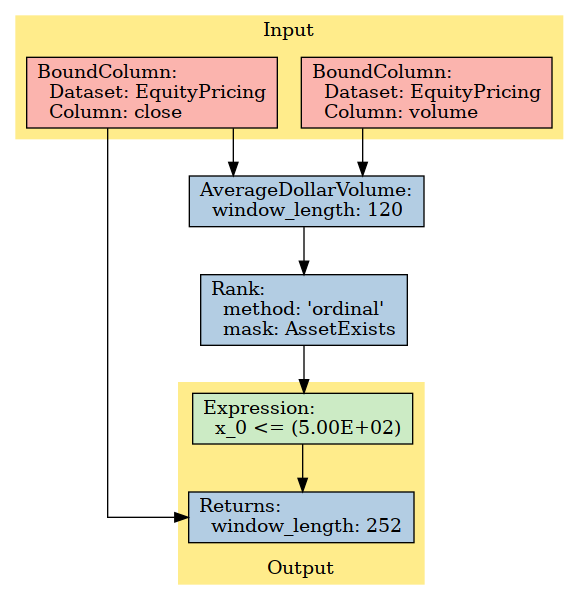

In [10]:
p1.show_graph(format='png')

## View the data of the factor

In [11]:
df1.head()

1YearReturns
2015-01-06 Equity(0 [A])        -0.017648
           Equity(1 [AAL])       0.993341
           Equity(2 [AAP])       0.399553
           Equity(3 [AAPL])      0.367343
           Equity(4 [ABBV])      0.282993

## Explore the demean function

The Returns class inherits from zipline.pipeline.factors.factor.  
[The documentation for demean is located here](https://www.zipline.io/appendix.html#zipline.pipeline.factors.Factor.demean), and is also pasted below:

```
demean(mask=sentinel('NotSpecified'), groupby=sentinel('NotSpecified'))[source]
Construct a Factor that computes self and subtracts the mean from row of the result.

If mask is supplied, ignore values where mask returns False when computing row means, and output NaN anywhere the mask is False.

If groupby is supplied, compute by partitioning each row based on the values produced by groupby, de-meaning the partitioned arrays, and stitching the sub-results back together.

Parameters:	
mask (zipline.pipeline.Filter, optional) – A Filter defining values to ignore when computing means.
groupby (zipline.pipeline.Classifier, optional) – A classifier defining partitions over which to compute means.
```

## Quiz 2

By looking at the documentation, and then the source code for `demean`, what are two parameters for this function?  Which one or ones would you call if you wanted to demean by sector and wish to demean for all values in the chosen universe?

[The source code](https://www.zipline.io/_modules/zipline/pipeline/factors/factor.html#Factor.demean) has useful comments to help you answer this question.

### Answer
We would use the groupby parameter, and we don't need to use the mask parameter, since we are not going to exclude any of the stocks in the universe from the demean calculation.

## Quiz 3
Turn 1 year returns into an alpha factor

We can do some processing to convert our signal (1 year return) into an alpha factor. One step is to demean by sector.

* demean
For each stock, we want to take the average return of stocks that are in the same sector, and then remove this from the return of each individual stock.

## Answer 3

In [12]:
# create a pipeline called p2
p2 = Pipeline(screen=universe,domain=US_EQUITIES)
# create a factor of one year returns, deman by sector
factor_demean_by_sector = (
    Returns(window_length=252, mask=universe).
    demean(groupby=Sector()) )

# add the factor to the p2 pipeline
p2.add(factor_demean_by_sector, 'Momentum_1YR_demean_by_sector')


## visualize the second pipeline

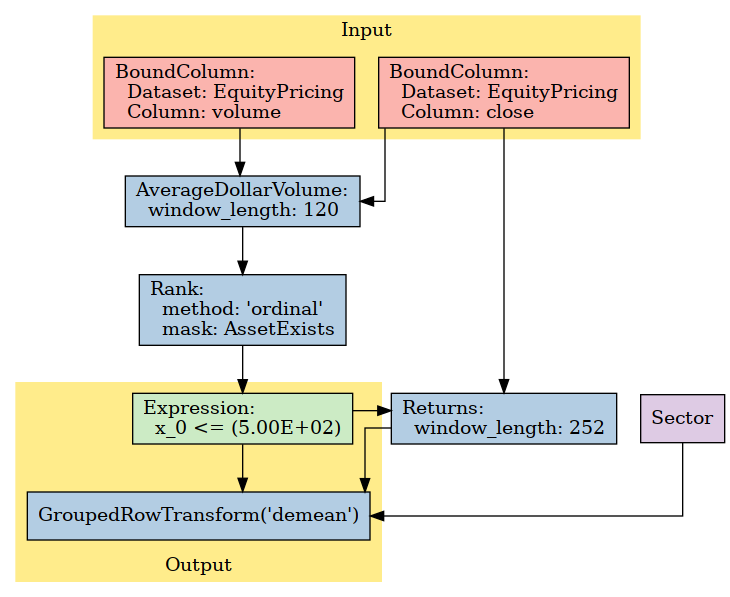

In [13]:
p2.show_graph(format='png')

## Quiz 4
How does this pipeline compare with the first pipeline that we created earlier?

## Answer 4 here


## run pipeline and view the factor data

In [14]:
df2 = engine.run_pipeline(p2, factor_start_date, universe_end_date)

In [15]:
df2

Momentum_1YR_demean_by_sector
2015-01-06 Equity(0 [A])                           -0.293722
           Equity(1 [AAL])                          0.836856
           Equity(2 [AAP])                          0.246739
           Equity(3 [AAPL])                         0.142938
           Equity(4 [ABBV])                         0.006918
...                                                      ...
2017-01-06 Equity(403 [XYL])                        0.158150
           Equity(404 [YUM])                        0.181748
           Equity(405 [ZBH])                       -0.049533
           Equity(406 [ZION])                       0.427454
           Equity(407 [ZTS])                        0.079639

[206448 rows x 1 columns]

### Rank 

Create a factor of one year returns, demeaned, and ranked



In [16]:
from zipline.pipeline.factors import Returns
#TODO
# create a pipeline called p

p = Pipeline(screen=universe,domain=US_EQUITIES)

# create a factor of one year returns, deman by sector, then rank
demean_factor = Returns(window_length=252, mask=universe).demean(groupby=Sector()).rank()

# add the factor to the pipeline

p.add(demean_factor, 'Momentum_1YR_demean_by_sector_ranked')

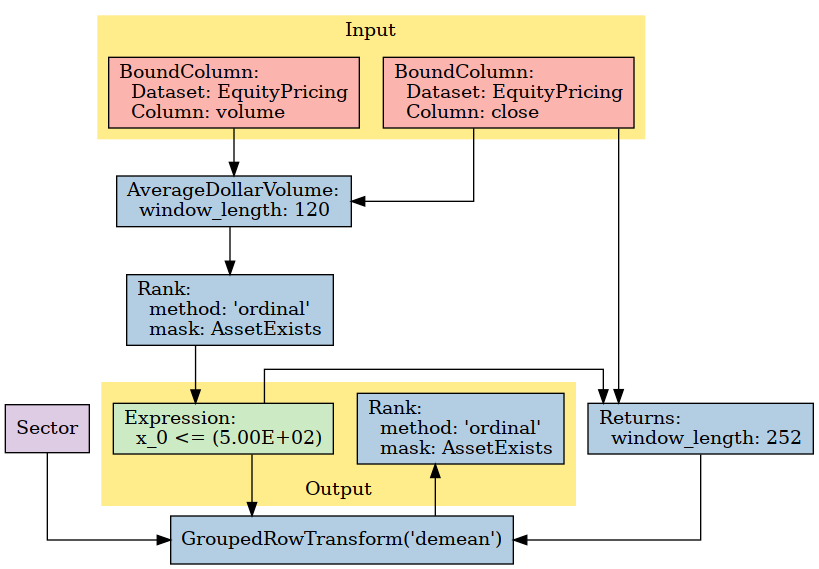

In [17]:
p.show_graph(format='png')

In [18]:
# run pipeline
df = engine.run_pipeline(p, factor_start_date, universe_end_date)

In [19]:
df

Momentum_1YR_demean_by_sector_ranked
2015-01-06 Equity(0 [A])                                       14.0
           Equity(1 [AAL])                                    405.0
           Equity(2 [AAP])                                    379.0
           Equity(3 [AAPL])                                   349.0
           Equity(4 [ABBV])                                   233.0
...                                                             ...
2017-01-06 Equity(403 [XYL])                                  342.0
           Equity(404 [YUM])                                  352.0
           Equity(405 [ZBH])                                  176.0
           Equity(406 [ZION])                                 396.0
           Equity(407 [ZTS])                                  291.0

[206448 rows x 1 columns]

### Z score

Explore the zscore function
The documentation for zscore is located here, and is also pasted below:

Construct a Factor that Z-Scores each day’s results.

The Z-Score of a row is defined as:

(row - row.mean()) / row.stddev()
If mask is supplied, ignore values where mask returns False when computing row means and standard deviations, and output NaN anywhere the mask is False.

If groupby is supplied, compute by partitioning each row based on the values produced by groupby, z-scoring the partitioned arrays, and stitching the sub-results back together.

Parameters:	
mask (zipline.pipeline.Filter, optional) – A Filter defining values to ignore when Z-Scoring.
groupby (zipline.pipeline.Classifier, optional) – A classifier defining partitions over which to compute Z-Scores.
Returns:	
zscored – A Factor producing that z-scores the output of self.

Return type:	
zipline.pipeline.Factor

In [20]:
from zipline.pipeline.factors import Returns
#TODO
# create a pipeline called p
p = Pipeline(screen=universe,domain=US_EQUITIES)
# create a factor of one year returns, deman by sector, then rank
factor_sector_deman = Returns(window_length=252, mask=universe).demean(groupby=Sector()).rank().zscore()
# add the factor to the pipeline

p.add(factor_sector_deman, 'Momentum_1YR_demean_by_sector_ranked_zscore')


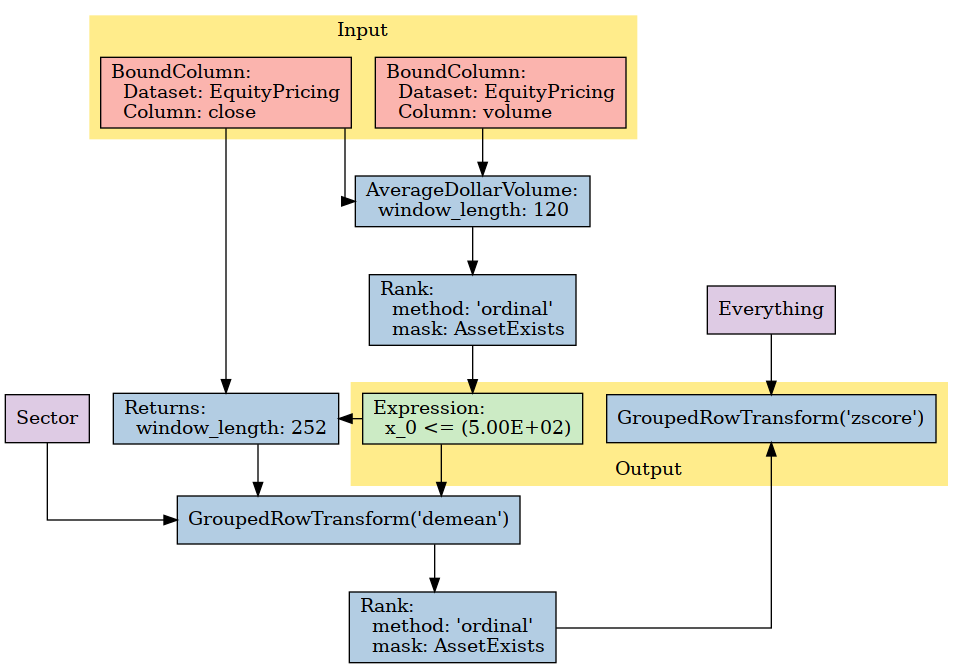

In [21]:
p.show_graph(format='png')

In [22]:
df = engine.run_pipeline(p, factor_start_date, universe_end_date)

In [23]:
df

Momentum_1YR_demean_by_sector_ranked_zscore
2015-01-06 Equity(0 [A])                                         -1.617435
           Equity(1 [AAL])                                        1.702339
           Equity(2 [AAP])                                        1.481587
           Equity(3 [AAPL])                                       1.226873
           Equity(4 [ABBV])                                       0.241978
...                                                                    ...
2017-01-06 Equity(403 [XYL])                                      1.167440
           Equity(404 [YUM])                                      1.252344
           Equity(405 [ZBH])                                     -0.241978
           Equity(406 [ZION])                                     1.625925
           Equity(407 [ZTS])                                      0.734426

[206448 rows x 1 columns]

### Smoothing 

In [24]:
from zipline.pipeline.factors import Returns
from zipline.pipeline.factors import SimpleMovingAverage

# create a pipeline called p
p = Pipeline(screen=universe,domain=US_EQUITIES)
# create a factor of one year returns, deman by sector, then rank
factor = (
    Returns(window_length=252, mask=universe).
    demean(groupby=Sector()). #we use the custom Sector class that we reviewed earlier
    rank().
    zscore()
)


# Use this factor as input into SimpleMovingAverage, with a window length of 5
# Also rank and zscore (don't need to de-mean by sector, s)
factor_smoothed = (
    SimpleMovingAverage(inputs=[factor], window_length=5).
    rank().
    zscore()
)

# add the unsmoothed factor to the pipeline
p.add(factor, 'Momentum_Factor')
# add the smoothed factor to the pipeline too
p.add(factor_smoothed, 'Smoothed_Momentum_Factor')


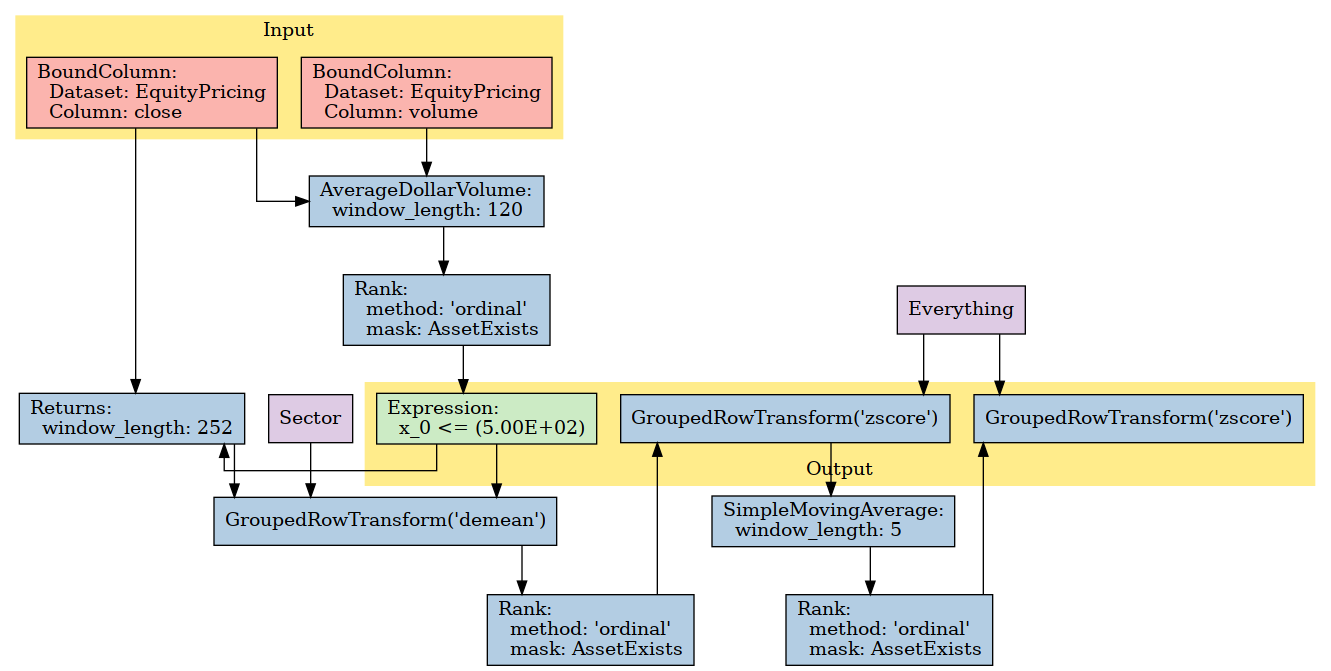

In [25]:
p.show_graph(format='png')

In [26]:
df = engine.run_pipeline(p, factor_start_date, universe_end_date)

df

Momentum_Factor  Smoothed_Momentum_Factor
2015-01-06 Equity(0 [A])             -1.617435                 -1.574982
           Equity(1 [AAL])            1.702339                  1.702339
           Equity(2 [AAP])            1.481587                  1.532530
           Equity(3 [AAPL])           1.226873                  1.294797
           Equity(4 [ABBV])           0.241978                  0.038207
...                                        ...                       ...
2017-01-06 Equity(403 [XYL])          1.167440                  1.260835
           Equity(404 [YUM])          1.252344                  1.286306
           Equity(405 [ZBH])         -0.241978                 -0.148583
           Equity(406 [ZION])         1.625925                  1.625925
           Equity(407 [ZTS])          0.734426                  0.810840

[206448 rows x 2 columns]

In [27]:
df.index.get_level_values(1)[0:5]


Index([   Equity(0 [A]),  Equity(1 [AAL]),  Equity(2 [AAP]), Equity(3 [AAPL]),
       Equity(4 [ABBV])],
      dtype='object')

In [28]:
# TODO
# get the level value for AAPL (it's at row index 3)
stock_index_name = df.index.get_level_values(1)[3]

print(type(stock_index_name))
print(stock_index_name)

<class 'zipline.assets._assets.Equity'>
Equity(3 [AAPL])


In [29]:
#notice, we'll put the stock_index_name inside of a list
single_stock_df = df[np.in1d(df.index.get_level_values(1), [stock_index_name])]
single_stock_df.head()

,,Momentum_Factor,Smoothed_Momentum_Factor
2015-01-06,Equity(3 [AAPL]),1.226873,1.294797
2015-01-07,Equity(3 [AAPL]),1.328759,1.294797
2015-01-08,Equity(3 [AAPL]),1.345740,1.303287
2015-01-09,Equity(3 [AAPL]),1.422154,1.320268
2015-01-12,Equity(3 [AAPL]),1.464606,1.345740


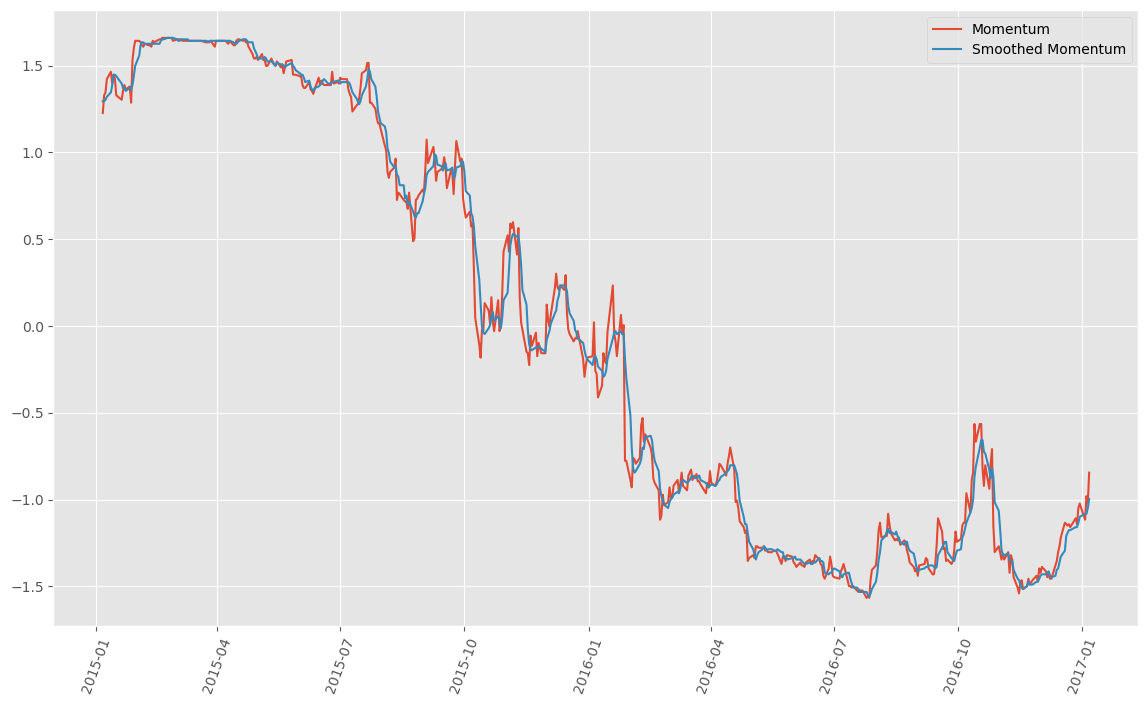

In [30]:
# import mticker
import matplotlib.ticker as mticker
fig,ax = plt.subplots()
# single_stock_df['Momentum_Factor'].plot(label='momentum')
# single_stock_df['Smoothed_Momentum_Factor'].plot(style='--', label='smoothed momentum')
ax.plot(single_stock_df.index.get_level_values(0),single_stock_df['Momentum_Factor'],label='Momentum')
ax.plot(single_stock_df.index.get_level_values(0),single_stock_df['Smoothed_Momentum_Factor'],label='Smoothed Momentum')
# rotate the x labels
plt.setp( ax.xaxis.get_majorticklabels(), rotation=70 )
ax.legend()
plt.show()

### Factor Returns

In [31]:
import alphalens as al

Get price data

Note, we already got the price data and converted it to returns, which we used to calculate a factor. We'll retrieve the price data again, but won't convert these to returns. This is because we'll use alphalens functions that take their input as prices and not returns.

In [32]:
# get list of stocks in our portfolio (tickers that identify each stock)
assets = df.index.levels[1].values.tolist()


pricing = get_pricing(
    data_portal,
    trading_calendar,
    assets,
    factor_start_date,
    universe_end_date
)


Preparing data for alphalens

In [33]:
import alphalens as al

Prepare data for use in alphalens

Alphalens makes sure the data is formatted properly so that other neat alphalens functions can work with the data. For instance, it lines up the price data and factor data and calculates forward returns that are associated with each factor value. We'll use alphalens.utils.get_clean_factor_and_forward_returns

We'll give it three inputs: the factor, prices, and periods.

The factor is the Series containing the factor scores for each stock on each date.

The prices are the Series of prices for each stock on each date (the same dates as for the factor). Note that if the period we give is greater than 1, we'll want to make sure to pad our price data by the period amount so that forward returns can be calculated. Keep reading for details about "periods" parameter.

periods: this is the period for which we'll compute forward returns. For instance, if prices and factor data have one data point per day (daily data), and if we wish to calculate the return of our factor-weighted portfolio every day, then the period would be 1, and input as a list [1]. If we wanted to calculate the weekly return, we would input [5]. If we wanted both daily and weekly, we could input [1,5].

returns: multi-index Pandas dataframe containing the cleaned version of the data.


In [34]:
factor_names = df.columns
print(f"The factor names are {factor_names}")
factor_data = {}
for factor_name in factor_names:
    print("Formatting factor data for: " + factor_name)
    # get clean factor and forward returns for each factor
    factor_data[factor_name] = al.utils.get_clean_factor_and_forward_returns(
        factor=df[factor_name],
        prices=pricing,
        periods=[1])

The factor names are Index(['Momentum_Factor', 'Smoothed_Momentum_Factor'], dtype='object')
Formatting factor data for: Momentum_Factor
Dropped 0.4% entries from factor data: 0.4% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!
Formatting factor data for: Smoothed_Momentum_Factor
Dropped 0.4% entries from factor data: 0.4% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


In [35]:
factor_data['Momentum_Factor'].head()

1D    factor  factor_quantile
date       asset                                                
2015-01-07 Equity(0 [A])     0.029975 -1.608944                1
           Equity(1 [AAL])   0.012262  1.702339                5
           Equity(2 [AAP])   0.008765  1.481587                5
           Equity(3 [AAPL])  0.038384  1.328759                5
           Equity(4 [ABBV])  0.010459  0.394807                4

In [36]:
df.head()

Momentum_Factor  Smoothed_Momentum_Factor
date       asset                                                      
2015-01-06 Equity(0 [A])           -1.617435                 -1.574982
           Equity(1 [AAL])          1.702339                  1.702339
           Equity(2 [AAP])          1.481587                  1.532530
           Equity(3 [AAPL])         1.226873                  1.294797
           Equity(4 [ABBV])         0.241978                  0.038207

In [37]:
ls_factor_return = []

for i, factor_name in enumerate(factor_names):
    #TODO: use alphalens function "factor_returns" to calculate factor returns
    #on each factor within the factor_data dictionary
    factor_return = al.performance.factor_returns(factor_data[factor_name])
    factor_return.columns = [factor_name]
    ls_factor_return.append(factor_return)

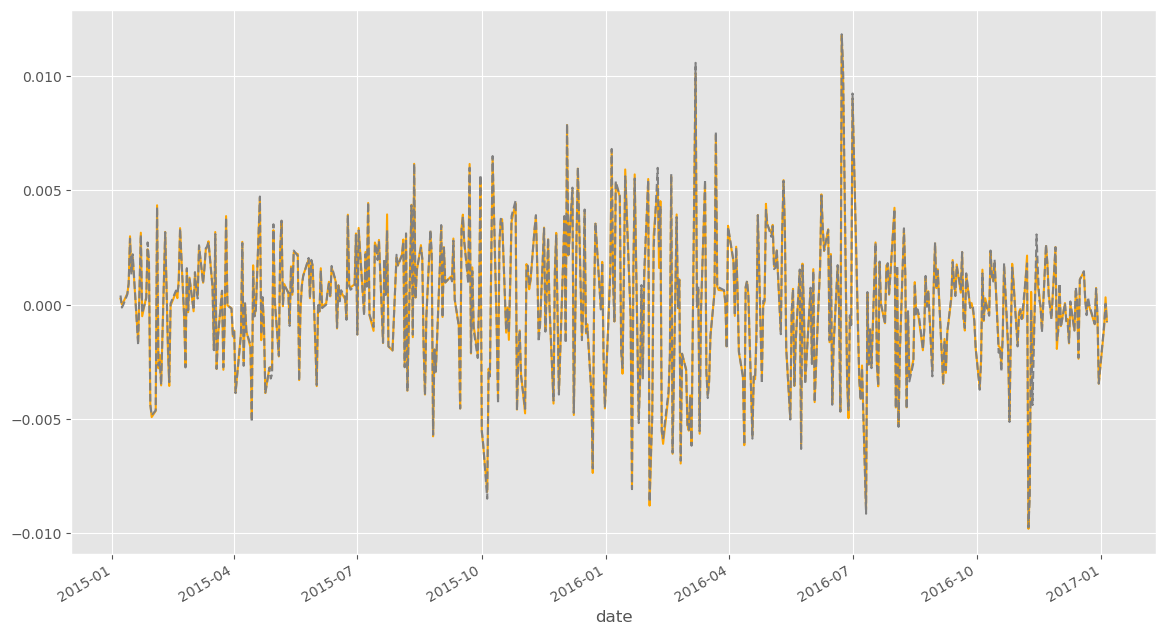

In [38]:
unsmoothed_factor_return = ls_factor_return[0]
smoothed_factor_return = ls_factor_return[1]

unsmoothed_factor_return['Momentum_Factor'].plot(color='orange')
smoothed_factor_return['Smoothed_Momentum_Factor'].plot(color='gray',style='--');

### Sharpe Ratio

Quiz 1: Sharpe ratio
Generally, a sharpe ratio of 1 or higher indicates a better factor than one with a lower Sharpe ratio. In other words, the returns that would have been accrued by a portfolio that was weighted according to the alpha factor would have had an annualized return that is greater or equal to its annualized volatility


In [39]:

def sharpe_ratio(df, frequency="daily"):

    if frequency == "daily":
        # TODO: daily to annual conversion
        annualization_factor = np.sqrt(252)
    elif frequency == "monthly":
        #TODO: monthly to annual conversion
        annualization_factor = np.sqrt(12)
    else:
        # TODO: no conversion
        annualization_factor = 1
        
    #TODO: calculate the sharpe ratio and store it in a dataframe.
    # name the column 'Sharpe Ratio'.  
    # round the numbers to 2 decimal places
    df_sharpe = pd.DataFrame(data=annualization_factor*df.mean()/df.std(),
     columns=['Sharpe Ratio']).round(2)
    
    return df_sharpe



In [40]:
# sharpe_ratio of unsmoothed momentum factor
sharpe_ratio(ls_factor_return[0])


,Sharpe Ratio
Momentum_Factor,-0.03


In [41]:
# sharpe_ratio of smoothed momentum factor
sharpe_ratio(ls_factor_return[1])


,Sharpe Ratio
Smoothed_Momentum_Factor,-0.05


smoothed factor has slightly lower sharpe ratio than the unsmoothed factor

### Rank infomation coefficient

Rank IC
The factor_information_coefficient function in alphalens documentation is here.

Also pasted below:

Computes the Spearman Rank Correlation based Information Coefficient (IC) between factor values and N period forward returns for each period in the factor index.

Parameters:	
factor_data : pd.DataFrame - MultiIndex

A MultiIndex DataFrame indexed by date (level 0) and asset (level 1), containing the values for a single alpha factor, forward returns for each period, the factor quantile/bin that factor value belongs to, and (optionally) the group the asset belongs to. - See full explanation in utils.get_clean_factor_and_forward_returns

group_adjust : bool

Demean forward returns by group before computing IC.

by_group : bool

If True, compute period wise IC separately for each group.

Returns:	
ic : pd.DataFrame

Spearman Rank correlation between factor and provided forward returns.

In [42]:
factor_names = df.columns
print(f"The factor names are {factor_names}")

# Use a dictionary to store each dataframe, one for each factor and its associated forward returns
factor_data = {}
for factor_name in factor_names:
    print("Formatting factor data for: " + factor_name)
    # Get clean factor and forward returns for each factor
    # Choose single period returns (daily returns)
    factor_data[factor_name] = al.utils.get_clean_factor_and_forward_returns(
        factor=df[factor_name],
        prices=pricing,
        periods=[1])
    

The factor names are Index(['Momentum_Factor', 'Smoothed_Momentum_Factor'], dtype='object')
Formatting factor data for: Momentum_Factor
Dropped 0.4% entries from factor data: 0.4% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!
Formatting factor data for: Smoothed_Momentum_Factor
Dropped 0.4% entries from factor data: 0.4% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


In [43]:
ls_rank_ic = []

for i, factor_name in enumerate(factor_names):
    #TODO: use alphalens function "factor_information_coefficient" to calculate rank IC
    rank_ic = al.performance.factor_information_coefficient(factor_data[factor_name])
    rank_ic.columns = [factor_name]
    ls_rank_ic.append(rank_ic)

<Axes: title={'center': 'rank IC'}, xlabel='date'>

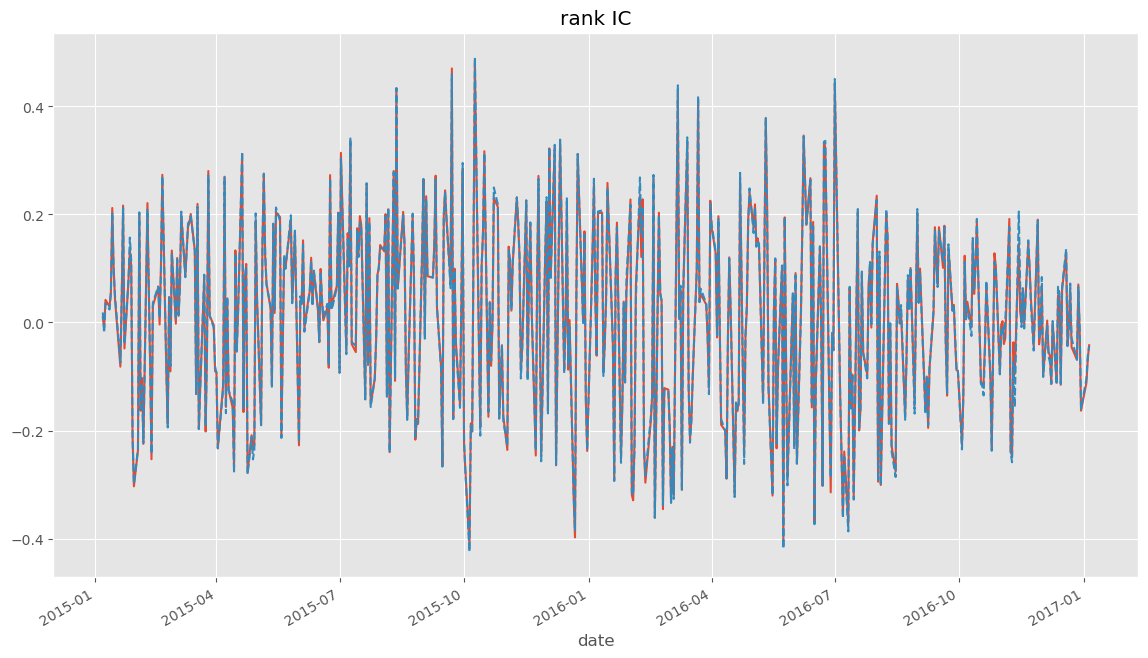

In [44]:
ls_rank_ic[0]['Momentum_Factor'].plot(title="rank IC")
ls_rank_ic[1]['Smoothed_Momentum_Factor'].plot(style='--')

## Turnover ratio

Turnover Analysis
One aspect of a good factor is one that does not incur as much transaction costs compared to other factors. How do some factors incur more transaction costs than others? Well, if a factor requires that we constantly rebalance our portfolio by buying and selling every day, then it would be more costly compared to a factor that only requires us to make trades once per quarter. If we look at the factor ranks (sort the stocks by their factor score on each day, then give them ranks 1,2,3...N), we can see how these factor ranks change from day to day. If, for instance, we have a portfolio of 3 stocks, and their ranks do not change for several days (for example: Stock A is always ranked 3rd, stock B is always ranked 1st, and stock C is always ranked 2nd), that means we would not have to initiate trades over those days in order to maintain portfolio weights that follow the alpha factor.

A proxy for the amount of trade turnover is the autocorrelation of the ranks over time. In the context of quant finance, we call this autocorrelation "factor rank autocorrelation", or FRA for short. 


In [45]:
factor_names = df.columns
ls_fra = []

for i, factor_name in enumerate(factor_names):
    print("Calculating the FRA for: " + factor_name)
    
    #TODO: look at the error generated from this line of code
    fra = al.performance.factor_rank_autocorrelation(factor_data[factor_name]).to_frame()
    fra.columns = [factor_name]
    ls_fra.append(fra)

df_ls_fra = pd.concat(ls_fra, axis=1)

Calculating the FRA for: Momentum_Factor
Calculating the FRA for: Smoothed_Momentum_Factor


<Axes: title={'center': 'Factor Rank Autocorrelation'}, xlabel='date'>

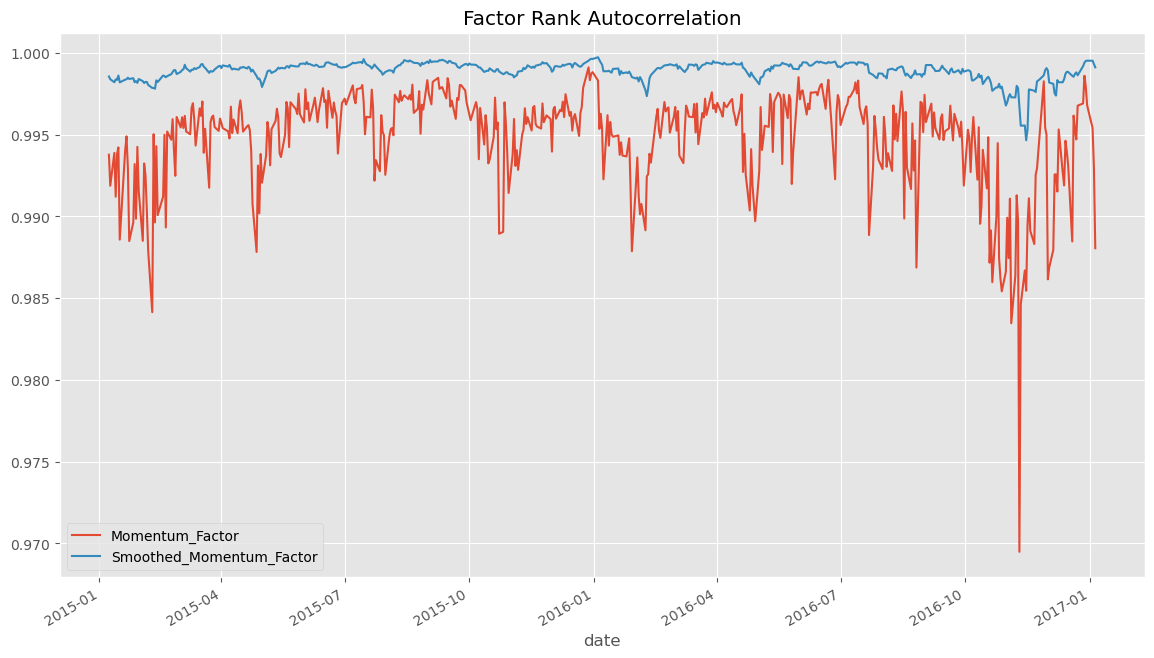

In [46]:
df_ls_fra.plot(title="Factor Rank Autocorrelation")

The FRA of the smoothed factor is higher compared to the unsmoothed factor. This potentially means less trading and therefore lower transaction costs.

## Quantile analysis

In [47]:
factor_names = df.columns
ls_qr = []

for i, factor_name in enumerate(factor_names):
    print("Calculating the FRA for: " + factor_name)
    
    #TODO: calculate quantile returns and standard errors
    # store the quantile returns
    quantile_return, quantile_stderr = al.performance.mean_return_by_quantile(factor_data[factor_name])
    quantile_return.columns = [factor_name]
    ls_qr.append(quantile_return)
df_ls_qr = pd.concat(ls_qr, axis=1)

Calculating the FRA for: Momentum_Factor
Calculating the FRA for: Smoothed_Momentum_Factor


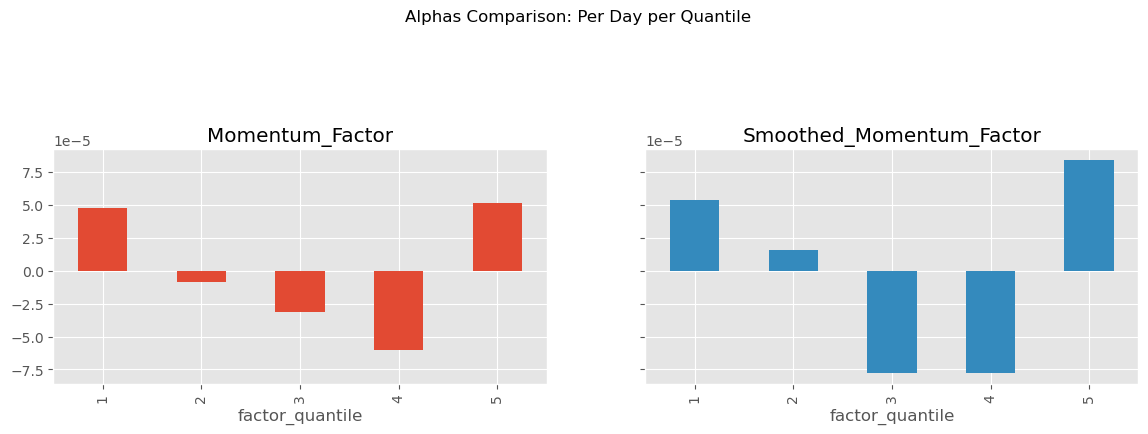

In [48]:
df_ls_qr.plot.bar(
    subplots=True,
    sharey=True,
    layout=(4,2),
    figsize=(14, 14),
    legend=False,
    title='Alphas Comparison: Per Day per Quantile'
);

The smoothed factor appears to have a more balanced distribution (more of the predictive power is distributed across more of the stocks in the portfolio). The unsmoothed appears to generate most of its returns from the tails (the highest and lowes quantiles). We'd prefer the smoothed factor because it relies on more of the stocks in the portfolio for the returns, instead of just the tail ends of the distribution of stocks.

Notice how the y-axis has pretty small numbers for the percentages. We normally use basis points as the unit of measurement. To convert from decimal (e.g. 0.01 is one percent) to basis points, multiply by $10^4$

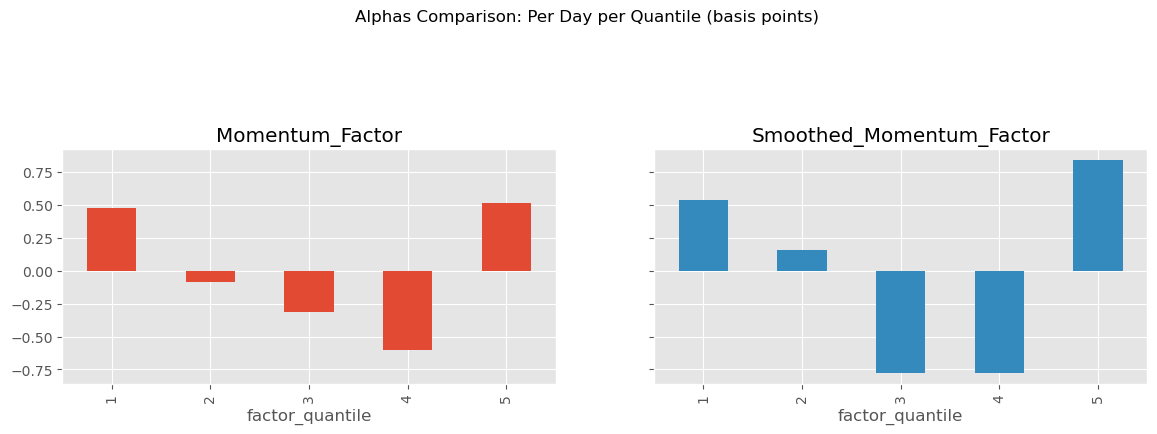

In [49]:
# rescaling the data to basis points
df_ls_qr_bp = 10000 * df_ls_qr
df_ls_qr_bp
df_ls_qr_bp.plot.bar(
    subplots=True,
    sharey=True,
    layout=(4,2),
    figsize=(14, 14),
    legend=False,
    title='Alphas Comparison: Per Day per Quantile (basis points)'
);

## Transfer Coefficient


In [50]:
from scipy.stats import pearsonr
from scipy.stats import spearmanr

num_stocks = 500
np.random.seed(201808)

def standardize_alpha(alpha_vector):
    return(alpha_vector - np.mean(alpha_vector))/np.sum(np.abs(alpha_vector))

#make up data for an alpha vector for a single time period
def simulate_alpha_vector():
    alpha_vector = np.random.normal(size=num_stocks)
    return alpha_vector

def simulate_optimized_weights(alpha_vector):
    standard_alpha_vector = standardize_alpha(alpha_vector)
    #add some noise that simulates optimization adjusting the weights.
    optimized_weights = standard_alpha_vector + np.random.normal(scale=0.001, size=num_stocks)
    return optimized_weights


alpha_vector = simulate_alpha_vector()

optimized_weights = simulate_optimized_weights(alpha_vector)


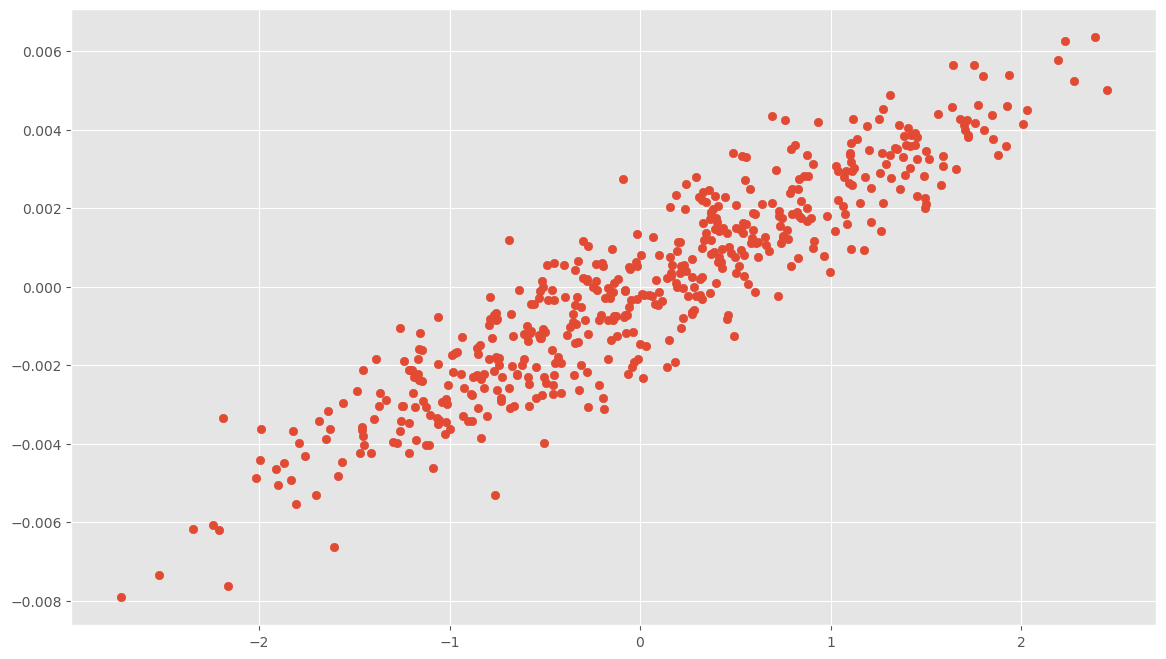

In [51]:
#Visualize alpha vector versus optimized weights
plt.scatter(alpha_vector,optimized_weights);

In [52]:
def calculate_transfer_coefficient(alpha_vector, optimized_weights):
    #TODO calculate the transfer coefficient
    transfer_coefficient, pvalue = pearsonr(alpha_vector, optimized_weights)
    return transfer_coefficient

transfer_coefficient = calculate_transfer_coefficient(alpha_vector, optimized_weights)
print(f"The transfer coefficient is {transfer_coefficient:.4f}") 

The transfer coefficient is 0.9235


## Overnight returns

[Overnight Returns and Firm-Specific Investor Sentiment](https://papers.ssrn.com/sol3/papers.cfm?abstract_id=2554010)

> **Abtract**: We explore the possibility that overnight returns can serve as a measure of firm-specific investor sentiment by analyzing whether they exhibit characteristics expected of a sentiment measure. First, we document short-term persistence in overnight returns, consistent with existing evidence of short-term persistence in share demand of sentiment-influenced retail investors. Second, we find that short-term persistence is stronger for harder-to-value firms, consistent with evidence that sentiment plays a larger role when there is less objective data available for valuation. Third, we show that stocks with high (low) overnight returns underperform (outperform) over the longer-term, consistent with evidence of temporary sentiment-driven mispricing.  

> **p 2, I**: The recent work of Berkman, Koch, Tuttle, and Zhang (2012) suggests that a stock’s
overnight (close-to-open) return can serve as a measure of firm-level sentiment.

> **p 3, I**: Specifically, Berkman et al. (2012) find that attention-generating events (high absolute returns or
strong net buying by retail investors) on one day lead to higher demand by individual investors,
concentrated near the open of the next trading day...This creates temporary price pressure at the
open, resulting in elevated overnight returns that are reversed during the trading day.

> **p 3, I**: We conduct three sets of analyses. **In the first
we test for short-run persistence in overnight returns.** The basis for expecting this from a
measure of sentiment is the evidence in Barber et al. (2009) that the order imbalances of retail
investors, who are the investors most likely to exhibit sentiment, persist for periods extending
over several weeks...In the third analysis we
examine whether stocks with high overnight returns underperform those with low overnight
returns over the long term.

## Walk through "Returns" class

We'll walk through how the `Returns` class works, because we'll create a new class that inherits from `Returns` in order to calculate a customized return.

### Returns inherits from CustomFactor
The zipline package has a class [zipline.pipeline.factors.Returns](https://www.zipline.io/appendix.html?highlight=returns#zipline.pipeline.factors.Returns) which inherits from class [zipline.pipeline.CustomFactor](https://www.zipline.io/appendix.html?highlight=custom%20factor#zipline.pipeline.CustomFactor).  The [source code for Returns is here](https://www.zipline.io/_modules/zipline/pipeline/factors/basic.html#Returns), and the [source code for CustomFactor is here.](https://www.zipline.io/_modules/zipline/pipeline/factors/factor.html#CustomFactor) 

**Please open the links to the documentation and source code and follow along with our notes about the code**
### Inputs variable
The CustomFactor class takes the `inputs` as a parameter of the constructor for the class, otherwise it looks for a class-level variable named `inputs`.  `inputs` takes a list of BoundColumn instances.  These help us choose what kind of price-volume data to use as input.  The `Returns` class sets this to
```
inputs = [USEquityPricing.close]
```
### USEquityPricing class
The class [USEquityPricing](https://www.zipline.io/appendix.html?highlight=usequitypricing#zipline.pipeline.data.USEquityPricing) has a couple BoundColumn instances that we can choose from.
close = USEquityPricing.close  
high = USEquityPricing.high  
low = USEquityPricing.low  
open = USEquityPricing.open  
volume = USEquityPricing.volume  

### Compute function
The function definition of the `Returns` class includes the `compute` function
```
def compute(self, today, assets, out, close):
        out[:] = (close[-1] - close[0]) / close[0]
        
```
* `today`: this is handled by parent classes; it has the datetime for the "today" row for the given subset of data.  We won't use it for this function implementation.
* `assets`: this is handled by parent classes: it has the column header names for the "out" and "close".  We won't use it for this function implementation.
* `out`: this points to a numpy array that will store the result of our compute.  It stores our "return" value of the `compute` function instead of explicitly returning a variable.
* `*input`: a tuple of numpy arrays that contain input data that we'll use to compute a signal.  In the `Returns` definition of `compute`, the input is a single value `close`, but we can list more if we need additional columns of data to compute a return.


If we set the `window_length=2`, then the `compute` function gets two rows worth of data from `close`.  The index 1 value is the most recent value, and the index 0 value is the earliest in time.  Recall that in Python, the -1 index is the same as getting the highest indexed value, so with a numpy array of just length two, -1 gives us the value at index 1.

So the line of code is calculating the one-day return using the close price, and storing that into the `out` variable.

$ Return = \frac{close_1 - close_0}{close_0} $ 
## Close To Open Returns (Overnight Returns)

The close-to-open return is the change in price between when the market closed on one day and when it opened on the next.  So it's

$ CloseToOpen = \frac{open_1 - close_0}{close_0}$ 

We'll now create a class `CTO` that inherits from `Return`, and override the `compute` function.

In [56]:
from zipline.pipeline.data import USEquityPricing
from zipline.pipeline.factors import Returns

class CloseToOpenReturns(Returns):
    """
    Returns the ratio of close-to-open returns
    """
    
    # TODO: Set window_length (we're calculating daily returns)
    window_length = 2

    # TODO: set inputs
    inputs = [USEquityPricing.open, USEquityPricing.close]
    
    # The compute method is passed the current day, the assets list, a pre-allocated out vector, and the
    # factor's items in the list `inputs`
    def compute(self, today, assets, out, opens, closes):
        #TODO: calculate close-to-open return and save into out[:]
        out[:] = (opens[-1] - closes[0]) / closes[0]

## Trailing overnight returns

The cumulative overnight returns over a week may be predictive of future returns; hence it's a kind of momentum signal.

$ TrailingOvernightReturns = \sum_{1}^{Days}CloseToOpen_t$  
Where $Days$ could be 5 if we are looking at a weekly window.

So we want to take the `CloseToOpenReturns` as our input into another class, `TrailingOvernightReturns`, which also inherits from `Returns`.
### mask
Note that we're going to create another class that inherits from `Returns`.  Recall that `Returns` inherits from [CustomFactor](https://www.zipline.io/appendix.html?highlight=factor#zipline.pipeline.CustomFactor), which has a `mask` parameter for its constructor.  The `mask` parameter takes in a `Filter` object, which determines which stock series get passed to the `compute` function.  Note that when we used `AverageDollarVolume` and stored its output in the variable `universe`, this `universe` variable is of type `Filter`.

In [57]:
class TrailingOvernightReturns(Returns):
    """
    Sum of trailing close-to-open returns; we expect sentiment persistence at short horizons, so we
    look at the 5-day (ie., 1 week) window
    """
    # TODO: choose a window_length to calculate a weekly return
    window_length = 5
    
    # TODO: set inputs to a list containing the daily close to open returns
    # Filter the close to open returns by our stock universe
    inputs = [CloseToOpenReturns(mask=universe)]
    
    def compute(self, today, assets, out, close_to_open):
        #TODO: calculate the sum of close_to_open
        #choose the axis so that there is a sum for each stock (each column)
        #treat NaN as zeros
        out[:] = np.nansum(close_to_open, axis=0)

In [58]:
# TODO: create an overnight_returns_factor variable
overnight_returns_factor = (
    TrailingOvernightReturns().
    demean(groupby=Sector()).
    rank().
    zscore()
)
# create a pipeline called p
p = Pipeline(screen=universe)
p.add(overnight_returns_factor, 'Overnight_Sentiment')

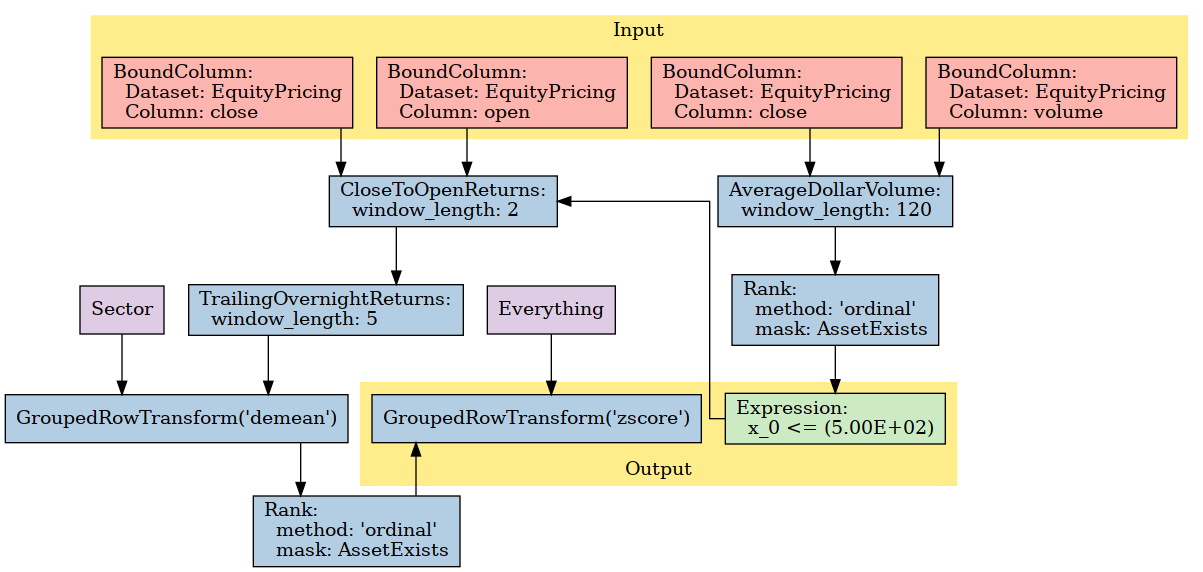

In [59]:
p.show_graph(format='png')

In [60]:
df = engine.run_pipeline(p, factor_start_date, universe_end_date)


Formatting factor data for: Overnight_Sentiment
Dropped 0.4% entries from factor data: 0.4% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!
Time to get arrange factor data: 1.21 secs
Time to generate long/short returns: 1.31 secs


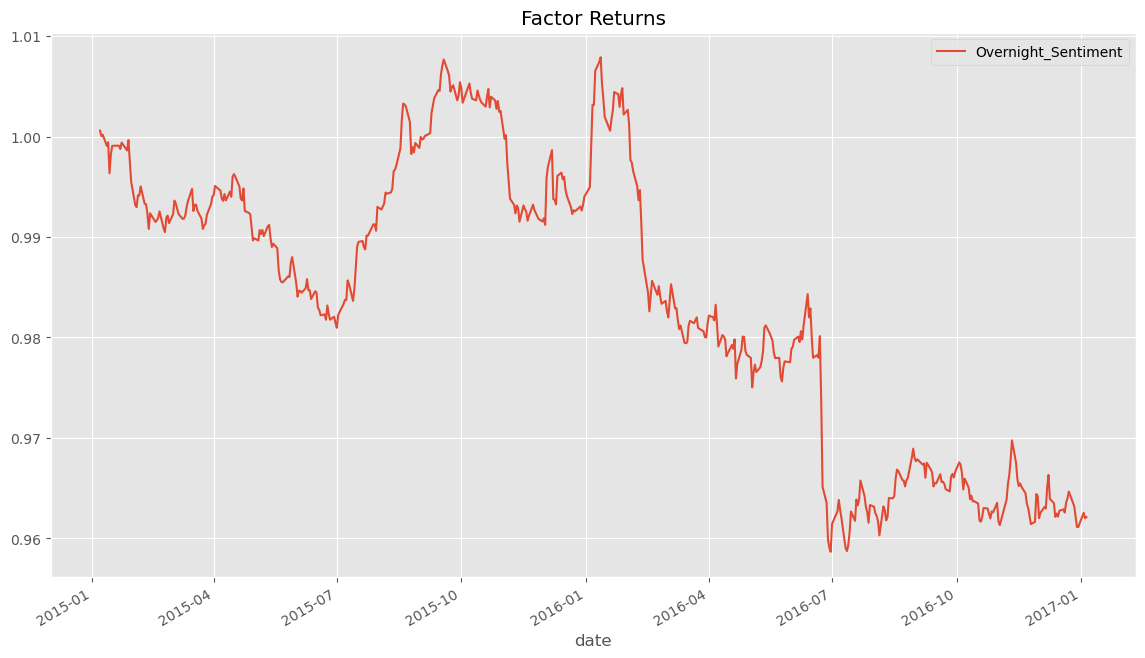

In [67]:
def make_factor_plot(df, data_portal, trading_calendar, start_date, end_date):
    assets = df.index.levels[1].values.tolist()
    df = df.dropna()
    pricing = get_pricing(
        data_portal,
        trading_calendar,
        assets,
        start_date,
        end_date,
        'close'
    )
    
    factor_names = df.columns
    factor_data = {}

    start_time = time.perf_counter()
    for factor in factor_names:
        print("Formatting factor data for: " + factor)
        factor_data[factor] = al.utils.get_clean_factor_and_forward_returns(
            factor=df[factor],
            prices=pricing,
            periods=[1]
        )
    end_time = time.perf_counter()

    print("Time to get arrange factor data: %.2f secs" % (end_time - start_time))
    
    ls_factor_returns = []

    start_time = time.perf_counter()
    for i, factor in enumerate(factor_names):
        ls = al.performance.factor_returns(factor_data[factor])
        ls.columns = [factor]
        ls_factor_returns.append(ls)
    end_time = time.perf_counter()
    print("Time to generate long/short returns: %.2f secs" % (end_time - start_time))

    df_ls_factor_returns = pd.concat(ls_factor_returns, axis=1)
    (1+df_ls_factor_returns).cumprod().plot(title='Factor Returns');
    return df_ls_factor_returns


df_ls_factor_returns = make_factor_plot(df, data_portal, trading_calendar,factor_start_date, universe_end_date)

